In [1]:
import pandas as pd
df = pd.read_csv('ifood_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ifood_df.csv'

In [3]:
import pandas as pd

# Load the data
df = pd.read_csv('ifood_df.csv')

# Show first 5 rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ifood_df.csv'

In [5]:
import pandas as pd
df = pd.read_csv('C:\\Users\\SHRIDHAR KS\\Downloads\\ifood_df.csv')

In [7]:
import pandas as pd

# Load the data
df = pd.read_csv('C:\\Users\\SHRIDHAR KS\\Downloads\\ifood_df.csv')

# Show first 5 rows
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [9]:
# Check for missing values
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [11]:
# Add up all the 'Mnt' (Money spent) columns
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                   df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Show the new column
df[['MntWines', 'MntFruits', 'TotalSpent']].head()

,MntWines,MntFruits,TotalSpent
0,635,88,1617
1,11,1,27
2,426,49,776
3,11,4,53
4,173,43,422


In [13]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])

# Show results
df[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,63,Senior
1,66,Senior
2,55,Senior
3,36,Middle
4,39,Middle


In [15]:
from sklearn.model_selection import train_test_split

# Features (all columns except 'Response')
X = df.drop(['Response', 'Customer_Days'], axis=1)  # We drop these 2

# Target (what we want to predict: Did they respond? 1 or 0)
y = df['Response']

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (1764, 39)
Testing data size: (441, 39)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create model
model = LogisticRegression(max_iter=1000)

# Train it
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Show results
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Middle'

In [19]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [21]:
df['Age'] = 2025 - df['Year_Birth']

KeyError: 'Year_Birth'

In [23]:
# See which columns are 'object' (text)
print(df.dtypes[df.dtypes == 'object'])

Series([], dtype: object)


In [25]:
# Show first few rows to see what your data looks like
print(df.head())

# Show data types of ALL columns (not just object)
print(df.dtypes)

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  education_2n Cycle  \
0              172                88            88  ...                   0   
1                2                 1             6  ...                   0   
2              111                21            42  ...                   0   
3               10                 3             5  ...                   0   
4               46                27            15  ...                   0   

   education_Basic  education_Graduation  ed

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create model
model = LogisticRegression(max_iter=1000)

# Train it
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Show results
print(classification_report(y_test, y_pred))

ValueError: could not convert string to float: 'Middle'

In [30]:
print("Text columns (object type):")
print(X.select_dtypes(include=['object']).columns.tolist())

Text columns (object type):
[]


In [32]:
# Map text to numbers
df['AgeGroup'] = df['AgeGroup'].map({'Young': 1, 'Middle': 2, 'Senior': 3})

# Then re-create X (without text columns)
X = df.drop(['Response', 'Customer_Days'], axis=1)
y = df['Response']

# Re-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create model
model = LogisticRegression(max_iter=1000)

# Train it
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       378
           1       0.66      0.30      0.41        63

    accuracy                           0.88       441
   macro avg       0.77      0.64      0.67       441
weighted avg       0.86      0.88      0.86       441



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# Always check for text columns before modeling
text_cols = X.select_dtypes(include=['object']).columns.tolist()
if len(text_cols) > 0:
    print(f"⚠️  Warning: Text columns found — convert them first: {text_cols}")
else:
    print("✅ All columns are numeric — ready for modeling!")

✅ All columns are numeric — ready for modeling!


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create model
model = LogisticRegression(max_iter=5000)

# Train it
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       378
           1       0.81      0.41      0.55        63

    accuracy                           0.90       441
   macro avg       0.86      0.70      0.75       441
weighted avg       0.90      0.90      0.89       441



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, create and train your model on the scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = model.predict(X_test_scaled)

# Show results
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       378
           1       0.73      0.43      0.54        63

    accuracy                           0.90       441
   macro avg       0.82      0.70      0.74       441
weighted avg       0.89      0.90      0.88       441



In [44]:
# Get feature importance (for Logistic Regression, we use coefficients)
importance = model.coef_[0]

# Create a table of features and their importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort by importance (absolute value)
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values('Abs_Importance', ascending=False)

# Show top 10
feature_importance.head(10)

,Feature,Importance,Abs_Importance
3,Recency,-0.804590,0.804590
14,NumWebVisitsMonth,0.625666,0.625666
2,Teenhome,-0.559681,0.559681
13,NumStorePurchases,-0.510258,0.510258
6,MntMeatProducts,0.498936,0.498936
36,AcceptedCmpOverall,0.361466,0.361466
15,AcceptedCmp3,0.325168,0.325168
26,marital_Single,0.324728,0.324728
33,education_PhD,0.294037,0.294037
10,NumDealsPurchases,0.286994,0.286994


In [46]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # 100 trees

# Train it
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy (RF): {accuracy_rf:.4f}")
print(f"AUC Score (RF): {auc_rf:.4f}")

# Feature Importance for Random Forest (often easier to interpret than Logistic Regression coefficients)
importances = rf_model.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)
print("\nTop 10 Features (Random Forest):")
print(feature_importance_rf.head(10))

NameError: name 'accuracy_score' is not defined

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Accuracy: 0.8957
AUC Score: 0.5000


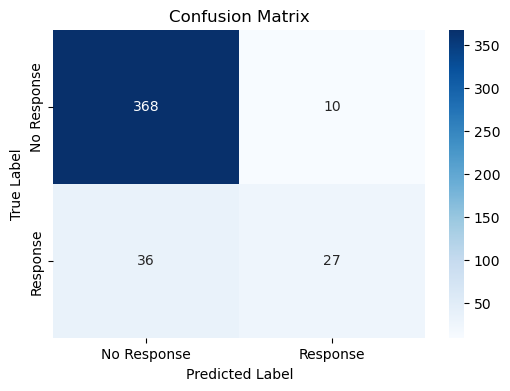

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) # Probability of class 1

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc:.4f}")

# Confusion Matrix (Visual representation)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Response', 'Response'],
            yticklabels=['No Response', 'Response'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set a default style for better-looking plots
sns.set_style("whitegrid")

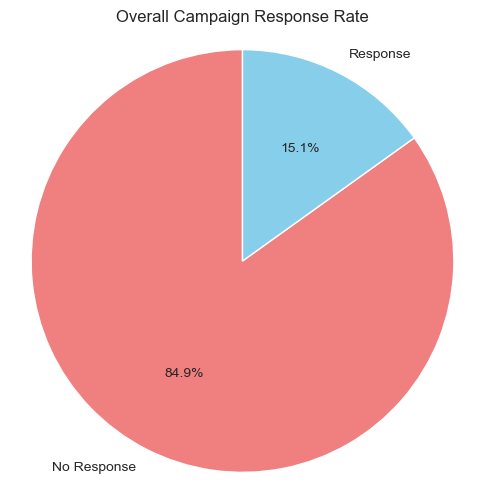

In [52]:
# Count the number of responders (1) and non-responders (0)
response_counts = df['Response'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(response_counts.values, labels=['No Response', 'Response'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Overall Campaign Response Rate')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\SHRIDHAR KS\AppData\Local\Temp\ipykernel_17140\1309186423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=df, palette=['lightcoral', 'skyblue'])


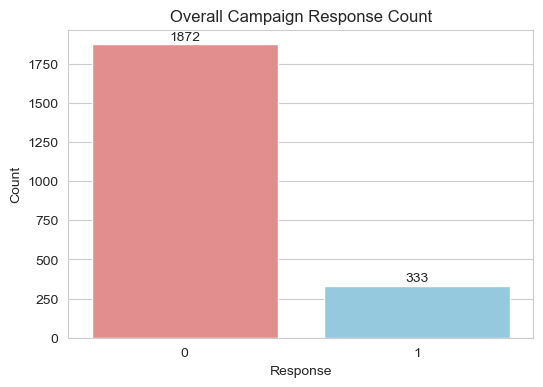

In [54]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Response', data=df, palette=['lightcoral', 'skyblue'])
plt.title('Overall Campaign Response Count')
plt.xlabel('Response')
plt.ylabel('Count')
# Add count labels on bars
for i, count in enumerate(response_counts.values):
     plt.text(i, count + 10, str(count), ha='center', va='bottom')
plt.show()

In [56]:
# Example: Assuming a column 'Education' exists
# Calculate response rate for each education level
response_by_education = df.groupby('Education')['Response'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=response_by_education.index, y=response_by_education.values, palette='viridis')
plt.title('Response Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Response Rate')
plt.xticks(rotation=45, ha='right') # Rotate labels if they are long
plt.show()

KeyError: 'Education'

C:\Users\SHRIDHAR KS\AppData\Local\Temp\ipykernel_17140\1242231707.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Recency', data=df, palette=['lightcoral', 'skyblue'])


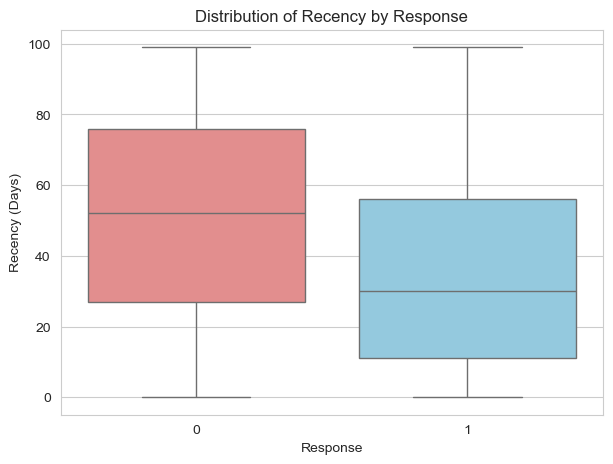

In [58]:
# Compare Recency between responders and non-responders (Box Plot)
plt.figure(figsize=(7, 5))
sns.boxplot(x='Response', y='Recency', data=df, palette=['lightcoral', 'skyblue'])
plt.title('Distribution of Recency by Response')
plt.xlabel('Response')
plt.ylabel('Recency (Days)')
plt.show()

C:\Users\SHRIDHAR KS\AppData\Local\Temp\ipykernel_17140\1915063182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='NumWebVisitsMonth', data=df, palette=['lightcoral', 'skyblue'])


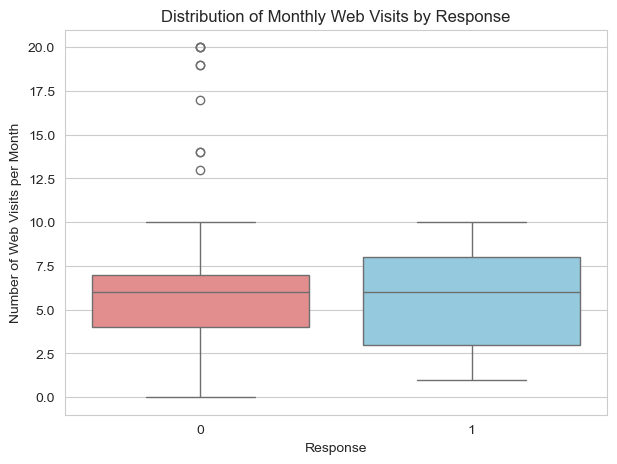

In [60]:
# Compare Web Visits between responders and non-responders (Box Plot)
plt.figure(figsize=(7, 5))
sns.boxplot(x='Response', y='NumWebVisitsMonth', data=df, palette=['lightcoral', 'skyblue'])
plt.title('Distribution of Monthly Web Visits by Response')
plt.xlabel('Response')
plt.ylabel('Number of Web Visits per Month')
plt.show()

C:\Users\SHRIDHAR KS\AppData\Local\Temp\ipykernel_17140\302230686.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_positive, palette='Greens_d')


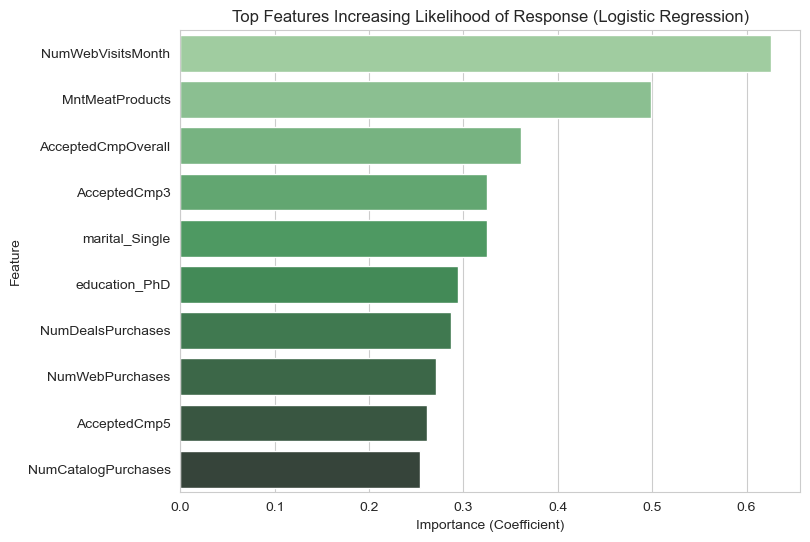

C:\Users\SHRIDHAR KS\AppData\Local\Temp\ipykernel_17140\302230686.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_negative, palette='Reds_r')


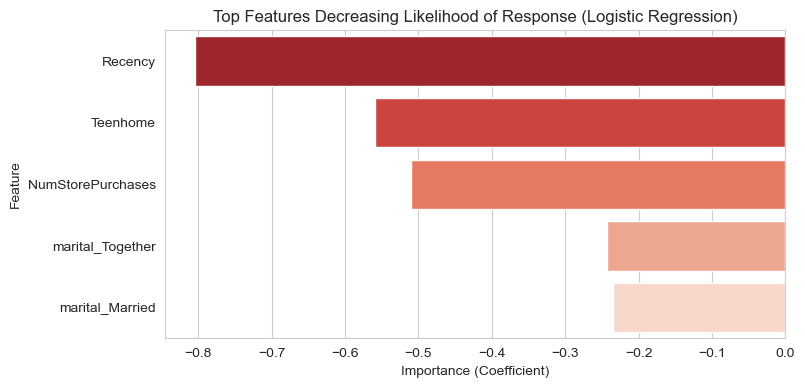

In [62]:
# Assuming you have a DataFrame 'feature_importance' with columns 'Feature' and 'Importance'
# Sort by importance (absolute value if needed, but Logistic Coefficients can be negative)
# Let's show top 10 positive and top 5 negative for Logistic Regression coefficients
top_positive = feature_importance[feature_importance['Importance'] > 0].head(10)
top_negative = feature_importance[feature_importance['Importance'] < 0].head(5)

# Combine for plotting (optional, or plot separately)
# For simplicity, let's plot top positive influencers
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=top_positive, palette='Greens_d')
plt.title('Top Features Increasing Likelihood of Response (Logistic Regression)')
plt.xlabel('Importance (Coefficient)')
plt.ylabel('Feature')
plt.show()

# And top negative influencers
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=top_negative, palette='Reds_r')
plt.title('Top Features Decreasing Likelihood of Response (Logistic Regression)')
plt.xlabel('Importance (Coefficient)')
plt.ylabel('Feature')
plt.show()